In [1]:
print ('Hello its me Sayan Ray')
print ('This is the python code to inspect the traversal of a turtlebot in a Triangle')

Hello its me Sayan Ray
This is the python code to inspect the traversal of a turtlebot in a Triangle


In [2]:
import rospy
from nav_msgs.msg import Odometry
from tf.transformations import euler_from_quaternion
from geometry_msgs.msg import Point, Twist
from math import atan2
import math as mt
import matplotlib.pyplot as plt

x = 0.0
y = 0.0 
theta = 0.0

def newOdom(msg):
    global x
    global y
    global theta

    x = msg.pose.pose.position.x
    y = msg.pose.pose.position.y

    rot_q = msg.pose.pose.orientation
    (roll, pitch, theta) = euler_from_quaternion([rot_q.x, rot_q.y, rot_q.z, rot_q.w])

rospy.init_node("speed_controller")

sub = rospy.Subscriber("/odom", Odometry, newOdom)
pub = rospy.Publisher("/cmd_vel", Twist, queue_size = 1)

speed = Twist()

r = rospy.Rate(4)

goal = Point()

xco = []
yco = []
finx = []
finy = []
time = []
goalx = []
errx = []
goaly = []
erry = []
headerr = []
pai = mt.pi

#These will serve as the new goals
xgo = [0,5,0]
ygo = [5,0,0]
g = 0

goal.x = xgo[0]
goal.y = ygo[0]

c = 0.0
while not rospy.is_shutdown():
    inc_x = goal.x -x
    inc_y = goal.y -y
    c = c + 0.25
    angle_goal = atan2(inc_y, inc_x)
    
    xco.append(x)
    yco.append(y)
    finx.append(goal.x)
    finy.append(goal.y)
    time.append(c)
    errx.append(inc_x)
    erry.append(inc_y)
    
    if ((goal.x == 0) and (goal.y== 0)):
        goalx.append(0)
        goaly.append(0)
    else:
        goalx.append((goal.x * 0.5 * c)/(goal.x**2 + goal.y**2))
        goaly.append((goal.y * 0.5 * c)/(goal.x**2 + goal.y**2))
        
        
    angle_err = angle_goal - theta
    headerr.append (angle_err)
    
    if (angle_err <= -pai): 
        angle_err = angle_err + 2*pai
    
    if (angle_err > pai):
        angle_err = angle_err - 2*pai
        

    if abs(angle_err) > 0.1:
        speed.linear.x = 0.0
        speed.angular.z = 0.3
    else:
        speed.linear.x = 0.5
        speed.angular.z = 0.0

    pub.publish(speed)
    r.sleep()
    if (abs(goal.x - x) < 0.1) and (abs(goal.y - y) < 0.1) and (g == 2):
        break
        
    if (abs(goal.x - x) < 0.1) and (abs(goal.y - y) < 0.1) and (g < 2):
        g = g + 1
        goal.x = xgo[g]
        goal.y = ygo[g]
        
speed.linear.x = 0.0
speed.angular.z = 0.0

the rosdep view is empty: call 'sudo rosdep init' and 'rosdep update'


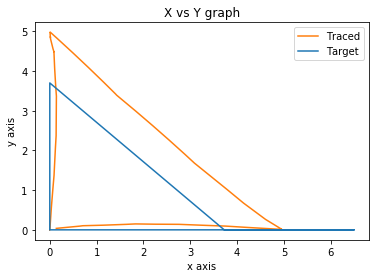

In [3]:
plt.plot(xco, yco, color ='tab:orange', label = 'Traced')
plt.plot(goalx,goaly, color ='tab:blue', label = 'Target')
# naming the x axis
plt.xlabel('x axis')

# naming the y axis
plt.ylabel('y axis')
 
# giving a title to my graph
plt.title('X vs Y graph')
 
# function to show the plot
plt.legend()
plt.show()

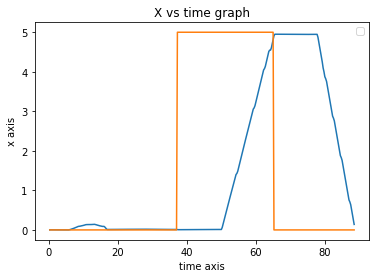

In [4]:
plt.plot(time, xco, color ='tab:blue')
plt.plot(time, finx, color ='tab:orange')

# naming the axes
plt.xlabel('time axis')
plt.ylabel('x axis')
 
# title of graph
plt.title('X vs time graph')
plt.legend() 
plt.show()

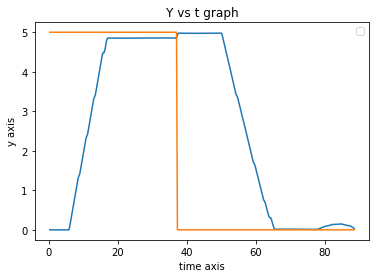

In [5]:
plt.plot(time, yco, color ='tab:blue')
plt.plot(time, finy, color ='tab:orange')

# naming the axes
plt.xlabel('time axis')
plt.ylabel('y axis')
 
# title of graph
plt.title('Y vs t graph')
plt.legend() 
plt.show()

speed.linear.x = 0.0
speed.angular.z = 0.0
quit() 

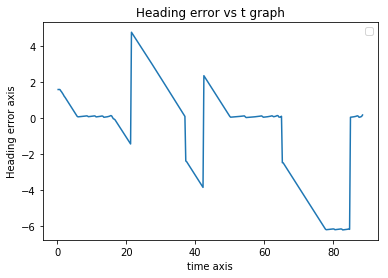

In [6]:
plt.plot(time, headerr, color ='tab:blue')

# naming the axes
plt.xlabel('time axis')
plt.ylabel('Heading error axis')
 
# title of graph
plt.title('Heading error vs t graph')
plt.legend() 
plt.show()

speed.linear.x = 0.0
speed.angular.z = 0.0
quit() 

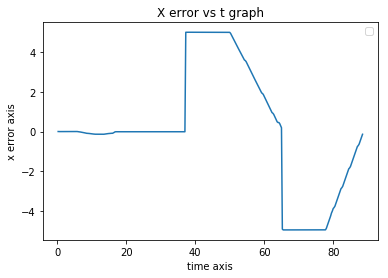

In [7]:
plt.plot(time, errx, color ='tab:blue')

# naming the axes
plt.xlabel('time axis')
plt.ylabel('x error axis')
 
# title of graph
plt.title('X error vs t graph')
plt.legend() 
plt.show()

speed.linear.x = 0.0
speed.angular.z = 0.0
quit() 

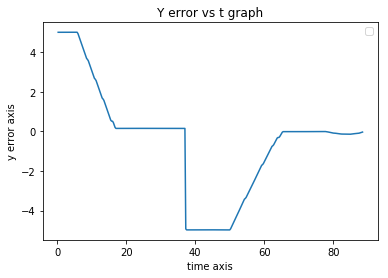

In [8]:
plt.plot(time, erry, color ='tab:blue')

# naming the axes
plt.xlabel('time axis')
plt.ylabel('y error axis')
 
# title of graph
plt.title('Y error vs t graph')
plt.legend() 
plt.show()

speed.linear.x = 0.0
speed.angular.z = 0.0
quit() 